In [150]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import ast

Read the data

In [135]:
battery_df = pd.read_csv("battery_merged.csv")

In [136]:
battery_df.head()

,Property,Name,Value,Raw_unit,Raw_value,Unit,Num_records,Extracted_name,DOI,Specifier,Tag,Warning,Type,Info,Title,Journal,Date,Correctness
0,Capacity,Fe2O3 / C,659.0,mAhg−1,and 659,Gram^(-1.0) Hour^(1.0) MilliAmpere^(1.0),1,"[{'Fe': '2.0', 'O': '3.0'}, {'C': '1.0'}]",10.1016/j.jallcom.2011.10.022,"discharge and charge capacity,",CDE,"S,",None,None,SOLVOTHERMALPREPARATIONLITHIUMSTORAGEPROPERTIE...,Journal of Alloys and Compounds,2011-10-17,None
1,Coulombic Efficiency,Ni @ C,100.0,%,100,Percent^(1.0),1,"[{'Ni': '1.0'}, {'C': '1.0'}]",10.1039/C6TA02339H,"coulombic,",CDE,None,None,None,Mesoporous Ni@C hybrids for a high energy aque...,Journal of Materials Chemistry A,2016/06/14,None
2,Voltage,Li2O2,2.3,V,2.3,Volt^(1.0),4,"[{'Li': '2.0', 'O': '2.0'}]","10.1016/j.electacta.2015.06.071, 10.1039/C6TA0...","voltage, voltage,",CDE,"R,",None,None,"CAPACITYENHANCEMENTALITHIUMOXYGENFLOWBATTERY, ...","Electrochimica Acta, Journal of Materials Chem...","2015-06-24, 2016/06/07, 2015/07/01, 2019-09-18",None
3,Capacity,Li2C8H4O4,85.0,mAhg−1,85,Gram^(-1.0) Hour^(1.0) MilliAmpere^(1.0),1,"[{'Li': '2.0', 'C': '8.0', 'H': '4.0', 'O': '4...",10.1016/j.pnsc.2016.06.004,"charge capacity,",CDE,"S,",None,"{'current_value': '0.2', 'current_units': 'C'},",ADESIGNEDCORESHELLSTRUCTURALCOMPOSITELITHIUMTE...,Progress in Natural Science: Materials Interna...,2016-08-10,None
4,Capacity,NVP / C,83.0,mAhg−1,"96.6 , 90.5 , 86.8 , 83.0 , 77.1 , 68.0 , and ...",Gram^(-1.0) Hour^(1.0) MilliAmpere^(1.0),1,"[{'N': '1.0', 'V': '1.0', 'P': '1.0'}, {'C': '...",10.1016/j.ensm.2019.05.041,"discharge capacities,",CDE,"S,",None,"{'current_value': '1', 'current_units': 'C'},",UNDERSTANDINGSUPERIORSODIUMIONSTORAGEINANOVELN...,Energy Storage Materials,2019-06-01,None


Battery data was extracted from various scientific algorithms by a specific algorithm presented here: https://www.nature.com/articles/s41597-020-00602-2

Sometimes the algorithm makes mistakes, but the overall precision of the algorithm is 80% as tested on the data where correct records were already known.

For further research we can leave only the data with correctness = none or true.

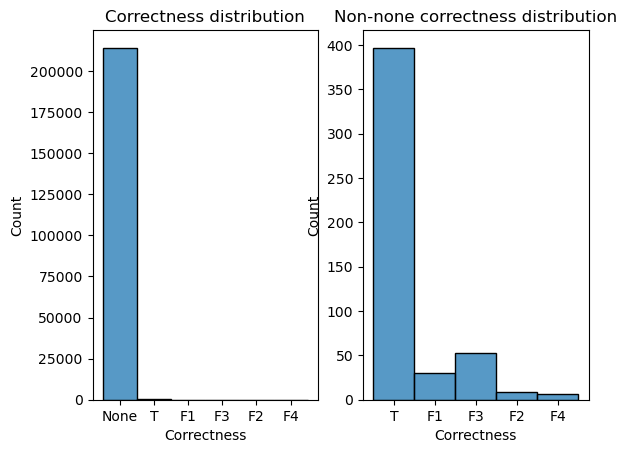

In [137]:
f, axes = plt.subplots(1, 2)
axes[0].set_title('Correctness distribution')
sns.histplot(battery_df, x='Correctness', ax=axes[0])
axes[1].set_title('Non-none correctness distribution')
sns.histplot(battery_df.query("Correctness != 'None'"), x='Correctness', ax=axes[1]);

In [138]:
battery_df = battery_df.query("Correctness in ('None', 'T')")
len(battery_df)

214518

Next lets analyze the warning field, the authors of the database marked the questionable values with a warning:

"The aforementioned warning flags, L, R and S, account for this diversity
in user motivation, by providing an option for users to remove data which might be circumspect owing to their
values being: near their extreme limit, questionable in terms of relevance to battery materials, or being part of a data series. While use of these warning flags will remove a lot of data, the database afforded would have a higher
overall precision of ca. 85%; an increase of 4.2% or 0.8% from use of the “L” or “R” warning flag, respectively." - quote from the paper

In [139]:
battery_df['Warning_binary'] = (battery_df['Warning'] != 'None').astype(str)

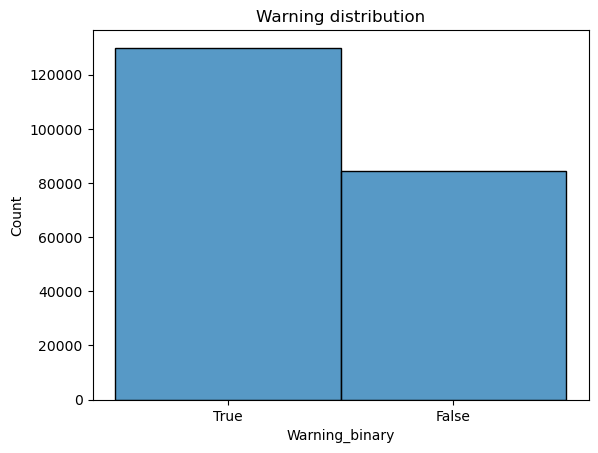

In [140]:
plt.title('Warning distribution')
sns.histplot(battery_df, x='Warning_binary');

Lets leave only the records with no warning for now

In [141]:
battery_df = battery_df.query("Warning == 'None'")
len(battery_df)

84568

In [142]:
battery_df.head()

,Property,Name,Value,Raw_unit,Raw_value,Unit,Num_records,Extracted_name,DOI,Specifier,Tag,Warning,Type,Info,Title,Journal,Date,Correctness,Warning_binary
1,Coulombic Efficiency,Ni @ C,100.00,%,100,Percent^(1.0),1,"[{'Ni': '1.0'}, {'C': '1.0'}]",10.1039/C6TA02339H,"coulombic,",CDE,None,None,None,Mesoporous Ni@C hybrids for a high energy aque...,Journal of Materials Chemistry A,2016/06/14,None,False
6,Capacity,Cu(OH)2,895.00,mAh/g,895 and 707,Gram^(-1.0) Hour^(1.0) MilliAmpere^(1.0),1,"[{'O': '2.0', 'H': '2.0', 'Cu': '1.0'}]",10.1016/j.matlet.2012.09.006,"discharge and charge capacities,",CDE,None,None,None,FACILESYNTHESISCUONANORODFORLITHIUMSTORAGEAPPL...,Materials Letters,2012-09-11,None,False
9,Energy,SnSbCo,1226.78,Wh/kg,1226.7799999999997,KiloGram^(-1.0) WattHour^(1.0),1,"[{'Sn': '1.0', 'Sb': '1.0', 'Co': '1.0'}]",None,None,Calculated,None,None,None,None,None,None,None,False
11,Capacity,NCO / CNTs nano,771.00,mAhg−1,771,Gram^(-1.0) Hour^(1.0) MilliAmpere^(1.0),1,"[{'N': '1.0', 'C': '1.0', 'O': '1.0'}]",10.1039/C5RA27708F,"specific capacity,",CDE,None,None,"{'current_value': '2000', 'current_units': 'mA...",The design and synthesis of porous NiCo 2 O 4 ...,RSC Advances,2016/03/29,None,False
13,Capacity,TiO2 / NiO / rGO nano,324.00,mAh/g,324,Gram^(-1.0) Hour^(1.0) MilliAmpere^(1.0),1,"[{'Ti': '1.0', 'O': '2.0'}, {'Ni': '1.0', 'O':...",10.1016/j.jallcom.2018.10.010,"discharge capacity,",CDE,None,None,"{'current_value': '20', 'current_units': 'mA/g...",TIO2NIOREDUCEDGRAPHENEOXIDENANOCOMPOSITESANODE...,Journal of Alloys and Compounds,2018-10-03,None,False


Lets check if units are consistent for each property

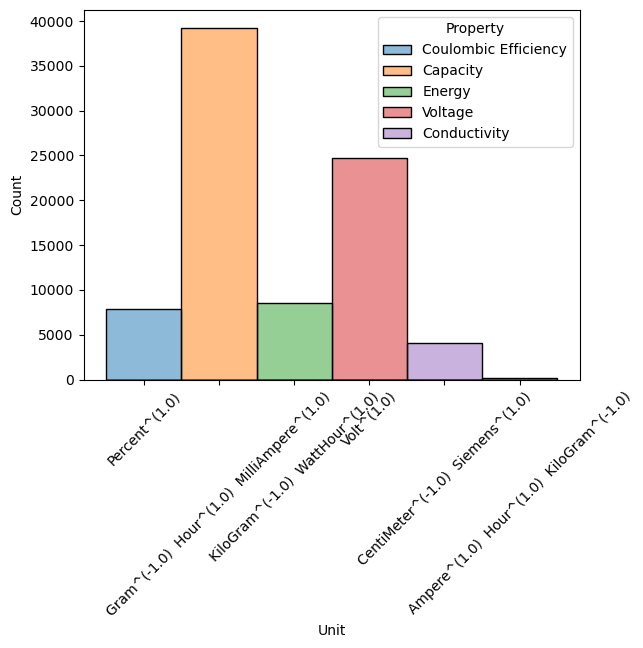

In [143]:
sns.histplot(battery_df, x='Unit', hue='Property')
plt.xticks(rotation=45);

We can see that there is a singular consistent unit for each property except for the Capacity. Lets remove the records with the faulty unit

In [144]:
battery_df = battery_df.query("Unit != 'Ampere^(1.0)  Hour^(1.0)  KiloGram^(-1.0)'")

After cleaning the original dataset lets transform it each property is a column

In [145]:
df = battery_df.pivot_table(
    index=['Name', 'Extracted_name'],
    columns='Property',
    values='Value'
)
df = df.reset_index()

In [146]:
df.head()

Property,Name,Extracted_name,Capacity,Conductivity,Coulombic Efficiency,Energy,Voltage
0,( 1 0 3 ) and ( 1 1 0 ) plane of delta-Mn3N2,"[{'Mn': '3.0', 'N': '2.0'}]",414.2,NaN,90.0,NaN,NaN
1,( 1 0 4 ) of CoCO3,"[{'Co': '1.0', 'C': '1.0', 'O': '3.0'}]",NaN,NaN,NaN,NaN,3.00
2,( 1 O 1 ) H,"[{'O': '1.0', 'H': '1.0'}]",NaN,NaN,NaN,NaN,3.65
3,( 1 − 2x)Li2MnO3·(3x)LiMn0.5Ni0.5O2,"[{'Li': '2.0', 'Mn': '1.0', 'O': '3.0'}]",NaN,NaN,NaN,NaN,4.60
4,( 1 − x)Li1.2Mn0.6Ni0.2O2·xLiMn1.5Ni0.5O4,"[{'Li': '1.2', 'Mn': '0.6', 'Ni': '0.2', 'O': ...",290.0,NaN,NaN,NaN,NaN


Lets take a look at the extracted name property

Lets analyze value distributions

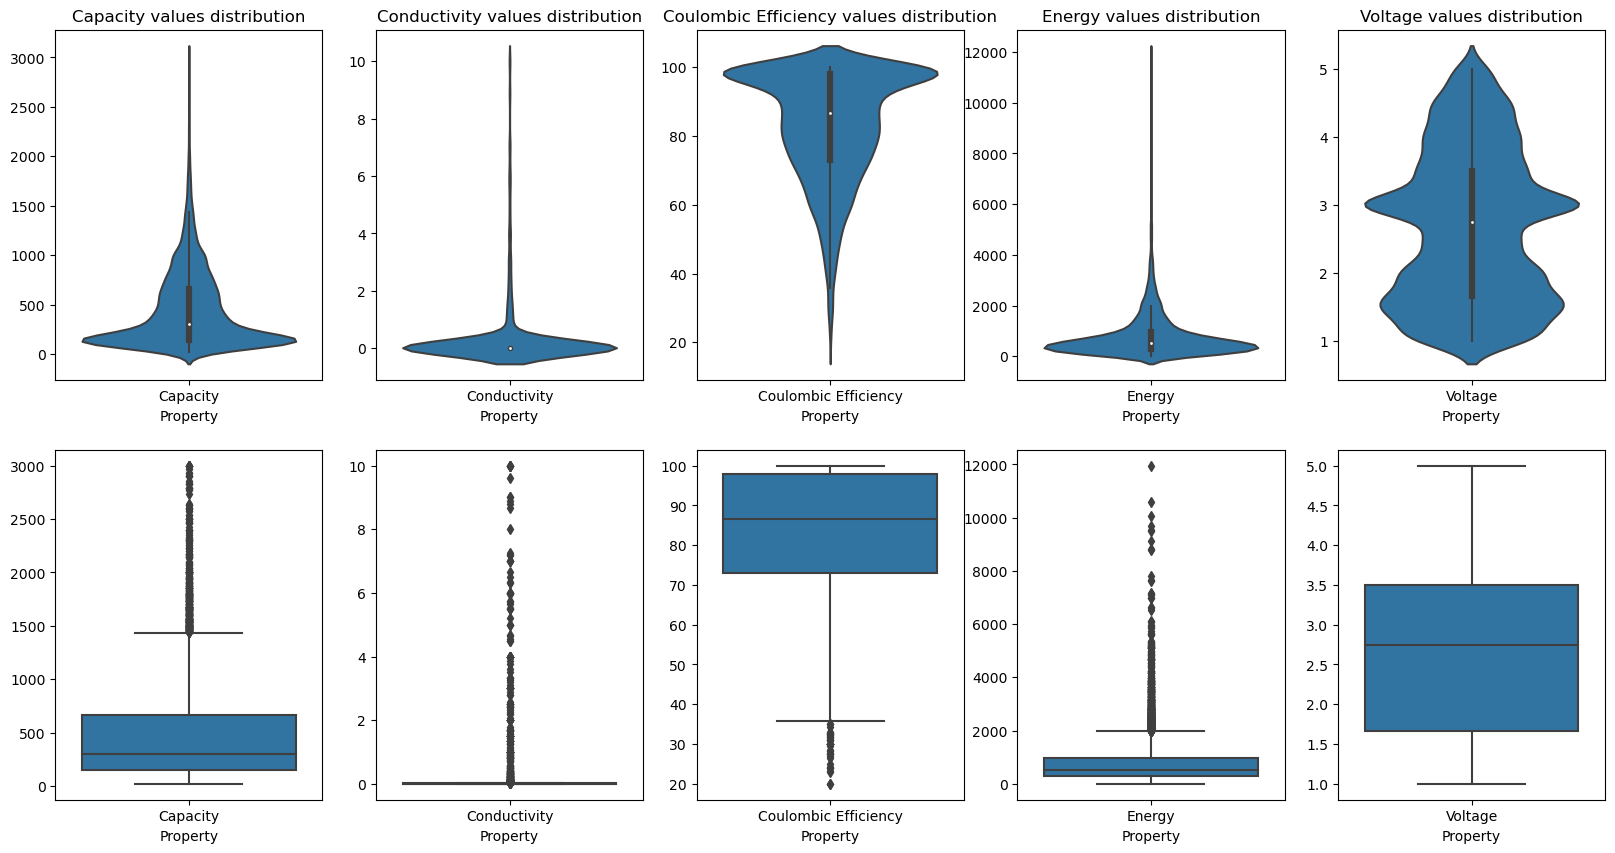

In [148]:
f, axes = plt.subplots(2, 5)
f.set_size_inches(20, 10)

properties = ['Capacity', 'Conductivity', 'Coulombic Efficiency', 'Energy', 'Voltage']
for i, property in enumerate(properties):
    axes[0][i].set_title(f'{property} values distribution')
    sns.violinplot(data=df[[property]], ax=axes[0][i])
    sns.boxplot(data=df[[property]], ax=axes[1][i])
    
plt.show()

Lets detect the outliers using the 1.5 x IQR criterion

In [149]:
get_outliers(df, 'Capacity') & []

/var/folders/8v/bx_f_4bj0klchryrhdgxty9h0000gn/T/ipykernel_21024/2456550871.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  get_outliers(df, 'Capacity') & []


Index([], dtype='object')

In [133]:
def get_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.index

total_outliers = pd.Index([])

for property in properties:
    outliers = get_outliers(df, property)
    total_outliers = total_outliers.union(outliers)
    print(f"{property} has {len(outliers)} outliers")
    
print(f"Total outlier rows: {len(total_outliers)}")

Capacity has 192 outliers
Conductivity has 224 outliers
Coulombic Efficiency has 7 outliers
Energy has 308 outliers
Voltage has 0 outliers
Total outlier rows: 728


Lets get rid of outliers

In [99]:
df.drop(total_outliers, inplace=True)
len(df)

23673

In [70]:
df.sort_values(by='Extracted_name')[7000:]

Property,Name,Extracted_name,Capacity,Conductivity,Coulombic Efficiency,Energy,Voltage
11082,LiBH4-Li3N,"[{'Li': '1.0', 'B': '1.0', 'H': '4.0'}]",NaN,NaN,NaN,NaN,3.000
11085,LiBH4–MCM-41,"[{'Li': '1.0', 'B': '1.0', 'H': '4.0'}]",NaN,0.00001,NaN,NaN,NaN
11083,LiBH4-Li3N,"[{'Li': '1.0', 'B': '1.0', 'H': '4.0'}]",NaN,NaN,NaN,NaN,3.000
11084,LiBH4-LiX,"[{'Li': '1.0', 'B': '1.0', 'H': '4.0'}]",NaN,0.00005,NaN,NaN,NaN
11077,LiBH4,"[{'Li': '1.0', 'B': '1.0', 'H': '4.0'}]",770.950000,0.00057,85.0,7155.158800,3.325
...,...,...,...,...,...,...,...
14132,Mg1.1(Zr0.85Nb0.15)4P6O24+0.4Zr2O(PO4)2,"[{'Zr': '5.4', 'Nb': '0.6', 'P': '8.0', 'O': '...",NaN,0.00953,NaN,NaN,NaN
25063,Zr7Ni10,"[{'Zr': '7.0', 'Ni': '10.0'}]",140.833333,NaN,NaN,197.826538,1.070
25064,Zr7Ni10.1,"[{'Zr': '7.0', 'Ni': '10.1'}]",199.500000,NaN,NaN,NaN,NaN
25065,Zr8Ni21,"[{'Zr': '8.0', 'Ni': '21.0'}]",70.500000,NaN,NaN,NaN,NaN


In [72]:
len(df['Name'])

25101

In [73]:
len(get_outliers(df, 'Capacity'))

413

In [ ]:
f, axes = plt.subplots(1, 5)
f.set_size_inches(20, 10)
for i, property in enumerate(['Capacity', 'Conductivity', 'Coulombic Efficiency', 'Energy', 'Voltage']):
    axes[i].set_title(f'{property} values distribution')
    sns.violinplot(data=df[[property]], ax=axes[i])
    
plt.show()

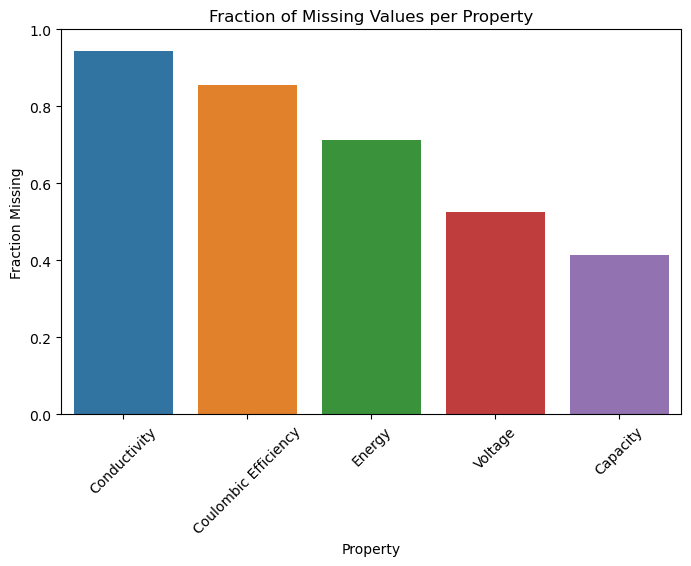

In [109]:
missing_fraction = df[properties].isnull().mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=missing_fraction.index, y=missing_fraction.values)
plt.ylim((0, 1))
plt.ylabel('Fraction of Missing Values')
plt.xlabel('Property')
plt.title('Fraction of Missing Values per Property')
plt.xticks(rotation=45)
plt.ylabel('Fraction Missing')
plt.show()


Our goal for this research is to try to predict these 5 missing target variables.

## Feature engineering

We know that some of the properties are already present. In this case we want to use them to predict the missing ones. To handle this lets add indicator features corresponding to whether we already know the value of the property or not.

In [123]:
df['Capacity'].isna().astype(int)

0        0
1        1
2        1
3        1
4        0
        ..
25096    0
25097    0
25098    0
25099    1
25100    0
Name: Capacity, Length: 23673, dtype: int64

In [127]:
for property in properties:
    df[f'{property}_known'] = (~df[property].isna()).astype(int)

### Specific chemical properties